In [1]:
import json

# Load the dataset
with open("C:/Users/ASUS/Desktop/Project/MS_Project/MMHS150K/MMHS150K_GT.json", 'r') as file:
    data = json.load(file)



In [9]:
import json
import os

# Load the main JSON data
main_json_path = 'C:/Users/ASUS/Desktop/Project/MMHS150K/MMHS150K_GT.json'
with open(main_json_path, 'r') as file:
    main_data = json.load(file)

# Directory of image text JSON files
img_txt_dir = 'C:/Users/ASUS/Desktop/Project/MMHS150K/img_txt'

combined_data = []

# Process each JSON file in the img_txt directory
for json_file in os.listdir(img_txt_dir):
    # Remove the .json extension to match the main JSON keys
    image_id = json_file[:-5]  # Strips off the ".json" part
    
    file_path = os.path.join(img_txt_dir, json_file)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            img_text = data.get('img_text', '').strip()  # Normalize text

            # Attempt to match and merge data
            if image_id in main_data:
                # Get entry details from main_data using image_id
                entry = main_data[image_id]
                # Append img_text and image_id to this entry
                combined_entry = {
                    **entry,  # Unpack all existing entry details
                    'img_text': img_text,  # Add the image text
                    'image_id': image_id  # Include the image_id explicitly
                }
                combined_data.append(combined_entry)
            else:
                print(f"No match found for image ID: {image_id}")

# Output the total number of combined entries and a sample for verification
print(f"Total combined entries: {len(combined_data)}")
if combined_data:
    print("Sample combined entry:", combined_data[0])


Total combined entries: 59252
Sample combined entry: {'tweet_url': 'https://twitter.com/user/status/1023940826882293760', 'labels': [5, 5, 5], 'img_url': 'http://pbs.twimg.com/media/DjXEwMpWsAEerq8.jpg', 'tweet_text': '@meloIigya When you’re slowly becoming retarded https://t.co/F6tbng2Q0A', 'labels_str': ['OtherHate', 'OtherHate', 'OtherHate'], 'img_text': "İ'M SLOWLY BEC«MİNG RETARpEp!", 'image_id': '1023940826882293760'}


combined_data

In [77]:
import json

# Define the file path where you want to save the combined data
save_path = 'C:/Users/ASUS/Desktop/Project/MMHS150K/combined_data.json'

# Use 'with' statement to ensure the file is properly closed after writing
with open(save_path, 'w', encoding='utf-8') as f:
    # json.dump to serialize combined_data to a JSON formatted string and write it to the file
    json.dump(combined_data, f, ensure_ascii=False, indent=4)

print("Combined data saved successfully.")


Combined data saved successfully.


In [59]:
# Assuming `main_data` is a dictionary where keys are image_ids (or tweet_ids) and values are tweet details
for image_id, entry in main_data.items():
    if image_id not in [item['image_id'] for item in combined_data]:
        combined_entry = {**entry, 'img_text': '', 'image_id': image_id}
        combined_data.append(combined_entry)


combined_data[:10]

In [62]:
# Function to combine classes
def combine_classes(original_class):
    if original_class in [1, 2, 3, 4, 5]:  
        return 1  # Hate Speech
    else:
        return 0  # Not Hate Speech

# Apply the combination of classes to each item in the dataset
for tweet_data in combined_data:
    original_classes = tweet_data['labels']
    combined_classes = [combine_classes(cls) for cls in original_classes]
    tweet_data['combined_labels'] = combined_classes
    # Assign the descriptive name based on the first combined class label (assuming there's at least one label)
    tweet_data['combined_names_str'] = combined_names_mapping.get(combined_classes[0], 'Unknown')


combined_data

In [64]:
# Load training, validation and test IDs
id_train0 = open("C:/Users/ASUS/Desktop/Project/MS_Project/MMHS150K/splits/train_ids.txt").read()
id_train = id_train0.split()

id_val0 = open("C:/Users/ASUS/Desktop/Project/MS_Project/MMHS150K/splits/val_ids.txt").read()
id_val = id_val0.split()

id_test0 = open("C:/Users/ASUS/Desktop/Project/MS_Project/MMHS150K/splits/test_ids.txt").read()
id_test = id_test0.split()

In [65]:
# Convert combined_data into a dictionary keyed by 'image_id'
data_dict = {item['image_id']: item for item in combined_data}

In [66]:
# Create the datasets for each set: training, validation, and test
dict_train = {image_id: data_dict[image_id] for image_id in id_train if image_id in data_dict}
dict_val = {image_id: data_dict[image_id] for image_id in id_val if image_id in data_dict}
dict_test = {image_id: data_dict[image_id] for image_id in id_test if image_id in data_dict}


In [67]:
print('Length: %d observations for the train set, %d for the validation and %d for the test.' % 
      (len(dict_train), len(dict_val), len(dict_test)))

Length: 134823 observations for the train set, 5000 for the validation and 10000 for the test.


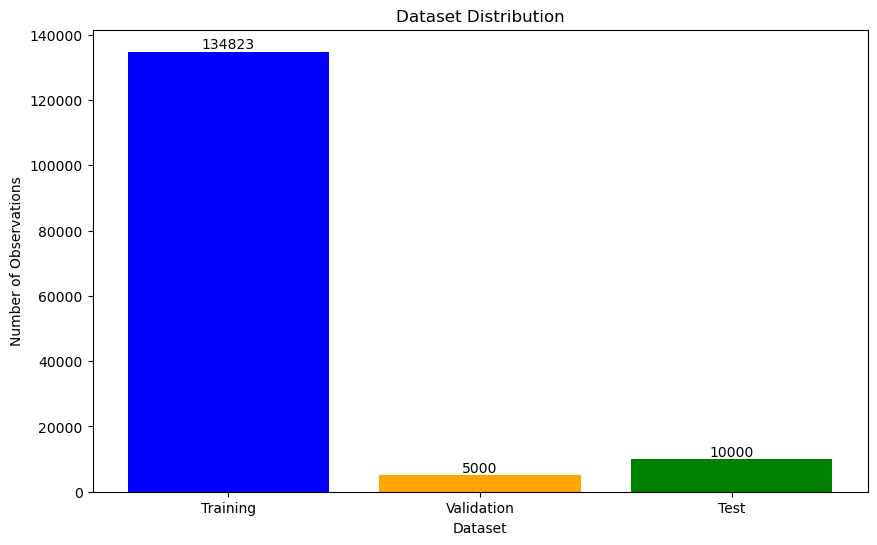

In [68]:
import matplotlib.pyplot as plt

# Assuming lengths and sets are defined as before
lengths = [len(dict_train), len(dict_val), len(dict_test)]
sets = ['Training', 'Validation', 'Test']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sets, lengths, color=['blue', 'orange', 'green'])

# Adding title and labels
plt.title('Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Number of Observations')

# Annotate each bar with the number of observations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()


dict_val

In [71]:

import pandas as pd
import numpy as np
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
def extract_text_and_combined_labels(data_dict):
    texts = []
    combined_labels_list = []

    for tweet_id, tweet_data in data_dict.items():
        texts.append(tweet_data['tweet_text'])
        combined_labels_list.append(tweet_data['combined_labels'])

    return texts, combined_labels_list

# Extracting for each dataset
text_train, labels3_train = extract_text_and_combined_labels(dict_train)
text_val, labels3_val = extract_text_and_combined_labels(dict_val)
text_test, labels3_test = extract_text_and_combined_labels(dict_test)


In [73]:
len(labels3_train)

134823

In [74]:
import numpy as np
from collections import Counter

def custom_majority_vote(annotations):
    """
    Determines the majority vote for each data point. In the case of a tie, chooses randomly.
    Assumes only 0 and 1 are valid labels.
    
    Parameters:
    annotations (list of list of int): The annotations for each data point.
    
    Returns:
    numpy.ndarray: The majority class for each data point.
    """
    custom_votes = []

    for annotation in annotations:
        counts = Counter(annotation)
        
        # If there's an equal number of 0s and 1s, choose the one present in the list first
        if counts[0] == counts[1]:
            custom_votes.append(annotation[0])
        else:
            # Choose the majority
            max_count = max(counts, key=counts.get)
            custom_votes.append(max_count)
            
    return np.array(custom_votes)

# Example usage (assuming labels3_train, labels3_val, and labels3_test are defined elsewhere)
labels_train = custom_majority_vote(labels3_train)
labels_val = custom_majority_vote(labels3_val)
labels_test = custom_majority_vote(labels3_test)

print(labels_train)
print(np.unique(labels_train))


[1 1 1 ... 0 0 0]
[0 1]


In [78]:
labels_val[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
#preprocessing

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# You might need to download these resources if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stop_words]
    
    # Stemming
    stemmed_words = [ps.stem(w) for w in filtered_words]
    
    text = " ".join(stemmed_words)
    return text

# Apply preprocessing to each dataset
def preprocess_data(data_dict):
    for key, value in data_dict.items():
        value['tweet_text'] = preprocess_text(value['tweet_text'])
        value['img_text'] = preprocess_text(value['img_text'])

# Preprocess training and validation data
preprocess_data(dict_train)
preprocess_data(dict_val)


In [79]:
len(dict_train)

134823

In [80]:
# Extracting for each dataset
text_train, labels3_train = extract_text_and_combined_labels(dict_train)
text_val, labels3_val = extract_text_and_combined_labels(dict_val)
text_test, labels3_test = extract_text_and_combined_labels(dict_test)

In [81]:
# Tokenizer object
tokens = Tokenizer()
tokens.fit_on_texts(text_train)
print('Total input of documents for tokenizer:', tokens.document_count)

# Train set
# Tokens to number sequences
text_encoded_train = tokens.texts_to_sequences(text_train)

# Padding to a determined length
max_length_tokens = 70 # Maximum characters in tweets is 280, assumption: 70 words (of 4 characters)
text_padded_train = pad_sequences(text_encoded_train,
                            maxlen = max_length_tokens, 
                            padding = 'post') # Padding after sequence

Total input of documents for tokenizer: 134823


In [ ]:
print("Before Padding:")
for seq in text_encoded_train:
    print(seq)

# Apply padding
text_padded_train = pad_sequences(text_encoded_train,
                                  maxlen=max_length_tokens,
                                  padding='post')  # Padding after sequence

# Visualize after padding
print("\nAfter Padding:")
for seq in text_padded_train:
    print(seq)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming text_encoded_train is already defined
max_length_tokens = 70  # As previously mentioned

# Apply padding
text_padded_train = pad_sequences(text_encoded_train, maxlen=max_length_tokens, padding='post')

# Calculate the lengths of original and padded sequences
original_lengths = [len(seq) for seq in text_encoded_train]
padded_lengths = [len(seq) for seq in text_padded_train]

# Visualize the distribution of original sequence lengths
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
counts_orig, bins_orig, _ = plt.hist(original_lengths, color='skyblue', edgecolor='black')
plt.title('Distribution of Original Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)

# Annotations for the original lengths histogram
for i, count in enumerate(counts_orig):
    if count > 0:
        plt.text(bins_orig[i] + (bins_orig[i+1] - bins_orig[i]) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=10, color='black')

# Visualize the distribution of padded sequence lengths
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
counts_padded, bins_padded, _ = plt.hist(padded_lengths, color='lightgreen', edgecolor='black')
plt.title('Distribution of Padded Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)

# Annotations for the padded lengths histogram
for i, count in enumerate(counts_padded):
    if count > 0:
        plt.text(bins_padded[i] + (bins_padded[i+1] - bins_padded[i]) / 2, count, str(int(count)),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [84]:
# Validation set
# Tokens to number sequences
text_encoded_val = tokens.texts_to_sequences(text_val)

# Padding to a determined length
text_padded_val = pad_sequences(text_encoded_val,
                            maxlen = max_length_tokens, 
                            padding = 'post') # Padding after sequence

# Test set
# Tokens to number sequences
text_encoded_test = tokens.texts_to_sequences(text_test)

# Padding to a determined length
text_padded_test = pad_sequences(text_encoded_test,
                            maxlen = max_length_tokens, 
                            padding = 'post') # Padding after sequence

In [34]:
#glove embeddings

In [85]:
# Dictionary for embeddings
glove_file_path = "C:/Users/ASUS/Desktop/Project/MS_Project/glove.twitter.27B/glove.twitter.27B.200d.txt"
embed_length = 200 # From glove.twitter.27B.200d.txt (dimensions)

embedding_index = {} # Embedding dictionary
with open(glove_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        temp = line.split()
        word = temp[0]
        coefs = np.asarray(temp[1:], dtype = np.float32)
        embedding_index[word] = coefs # Add word to dictionary with the embedding values

print('Length of word vectors:', len(embedding_index))

Length of word vectors: 1193514


In [86]:
# Weight matrix for training set tokens 
vocab_length = len(tokens.word_index) + 1  
embedding_matrix = np.zeros((vocab_length, embed_length))
 
for word, index in tokens.word_index.items():
  # Search for training set's tokens in the embeddings data
    embedding_vector = embedding_index.get(word)
 
  # If found, add to matrix
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

#print(embedding_matrix[1])
print('Dimensions of matrix: %d rows x %d columns' %
      (len(embedding_matrix), len(embedding_matrix[0])))

Dimensions of matrix: 46718 rows x 200 columns


In [87]:
text_padded_train = np.array(text_padded_train, dtype = 'float32')
labels_train = np.array(labels_train, dtype = 'float32')

text_padded_val = np.array(text_padded_val, dtype = 'float32')
labels_val = np.array(labels_val, dtype = 'float32')

text_padded_test = np.array(text_padded_test, dtype = 'float32')
labels_test = np.array(labels_test, dtype = 'float32')

In [38]:
#model-implemmentation

In [88]:

from tensorflow.keras.utils import plot_model
from sklearn.utils import class_weight

In [89]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.initializers import Constant
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

def model_LSTM_binary(units_lstm, vocab_len, embed_len, max_len_tok, embed_mat, bi):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_len, output_dim=embed_len, input_length=max_len_tok,
                        embeddings_initializer=Constant(embed_mat), trainable=False))
    if bi:
        model.add(Bidirectional(LSTM(units_lstm, return_sequences=False)))  # `return_sequences=False` to return the last state
    else:
        model.add(LSTM(units_lstm, return_sequences=False))  # Adjust units_lstm to 150 for 150-dimensional output
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Change for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(np.unique(labels_train))
# Model parameters
units_lstm = 150  # For 150-dimensional vector output from LSTM
vocab_len = vocab_length  # Adjust as per your vocabulary size
embed_len = embed_length  # Assuming using 200-dimensional GloVe embeddings
max_len_tok = max_length_tokens  # Maximum length of a tokenized tweet
embed_mat = embedding_matrix  # Placeholder for actual GloVe embeddings

# Create binary classification model
model_lstm_binary = model_LSTM_binary(units_lstm, vocab_len, embed_len, max_len_tok, embed_mat, bi=True,)

# Assuming 'labels_train' is binary encoded, 'text_padded_train', 'text_padded_val', and 'labels_val' are defined
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for binary classification
classes = np.unique(labels_train)
class_weights_arr = compute_class_weight(class_weight='balanced', classes=classes, y=labels_train)
class_weight_dict = {classes[i]: weight for i, weight in enumerate(class_weights_arr)}

# Callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# Training the model
history = model_lstm_binary.fit(text_padded_train, labels_train, batch_size=64, epochs=30,
                                validation_data=(text_padded_val, labels_val), shuffle=True,
                                class_weight=class_weight_dict, verbose=1, callbacks=callbacks)


Epoch 1/30
2107/2107 [==============================] - ETA: 0s - loss: 0.6153 - accuracy: 0.6942

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2107/2107 [==============================] - 200s 94ms/step - loss: 0.6153 - accuracy: 0.6942 - val_loss: 0.6021 - val_accuracy: 0.6884
Epoch 2/30
2107/2107 [==============================] - 173s 82ms/step - loss: 0.6056 - accuracy: 0.7059 - val_loss: 0.6023 - val_accuracy: 0.6916
Epoch 3/30
2107/2107 [==============================] - 183s 87ms/step - loss: 0.6000 - accuracy: 0.7093 - val_loss: 0.6011 - val_accuracy: 0.6942
Epoch 4/30
2107/2107 [==============================] - 177s 84ms/step - loss: 0.5947 - accuracy: 0.7154 - val_loss: 0.6035 - val_accuracy: 0.6892
Epoch 5/30
2107/2107 [==============================] - 180s 85ms/step - loss: 0.5862 - accuracy: 0.7212 - val_loss: 0.6054 - val_accuracy: 0.6902
Epoch 6/30
  72/2107 [>.............................] - ETA: 2:47 - loss: 0.5777 - accuracy: 0.7177

KeyboardInterrupt: 

157/157 [==============================] - 3s 17ms/step


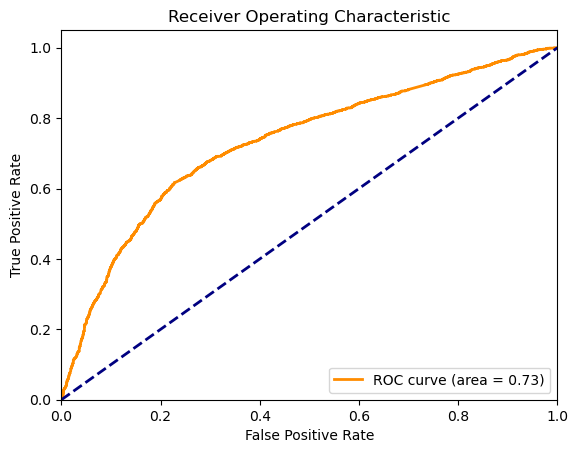

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba = model_lstm_binary.predict(text_padded_val)

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(labels_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [91]:
from keras.models import Model

# Assuming `model_lstm_binary` is your trained model and you want to extract the LSTM features
lstm_output_layer = model_lstm_binary.layers[-3]  # Assuming this is your LSTM or Bidirectional LSTM layer
feature_extractor = Model(inputs=model_lstm_binary.input, outputs=lstm_output_layer.output)

# To extract features for your training, validation, or test set:
lstm_features_train = feature_extractor.predict(text_padded_train)  # Example for training set
lstm_features_val = feature_extractor.predict(text_padded_val)
lstm_features_test = feature_extractor.predict(text_padded_test)

313/313 [==============================] - 4s 12ms/step


In [92]:
# Save LSTM features for training set
np.save("C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_train_lstm_features.npy", lstm_features_train)

# Save LSTM features for validation set
np.save("C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_val_lstm_features.npy", lstm_features_val)

# Save LSTM features for test set
np.save("C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_test_lstm_features.npy", lstm_features_test)

print("LSTM features saved successfully.")


LSTM features saved successfully.


In [2]:
import numpy as np
lstm_features_train_path = "C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_train_lstm_features.npy"
lstm_features_val_path = "C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_val_lstm_features.npy"
lstm_features_test_path = "C:/Users/ASUS/Desktop/Project/ImageTextFeatures/imageText_test_lstm_features.npy"


lstm_features_train= np.load(lstm_features_train_path)
lstm_features_val= np.load(lstm_features_val_path)
lstm_features_test= np.load(lstm_features_test_path)

In [3]:
#tweet text + image text + image - unimodal

In [4]:
#loading image features
import numpy as np

# Paths to the .npy files
training_features_path = r"C:\Users\ASUS\Desktop\Project\Features\train_features_combined (1).npy"
training_labels_path = r"C:\Users\ASUS\Desktop\Project\Features\train_labels_combined.npy"
validation_features_path = r"C:\Users\ASUS\Desktop\Project\Features\val_features_combined.npy"
validation_labels_path = r"C:\Users\ASUS\Desktop\Project\Features\val_labels_combined.npy"

# Loading the training features and labels
training_features = np.load(training_features_path)
training_labels = np.load(training_labels_path)

# Loading the validation features and labels
validation_features = np.load(validation_features_path)
validation_labels = np.load(validation_labels_path)

# Print out the shapes to confirm
print(f"Training features shape: {training_features.shape}")


Training features shape: (134823, 2048)


In [5]:
from keras.utils import to_categorical
# Assuming training_labels and validation_labels are in one-hot encoded format
# Convert one-hot encoded labels to binary classification format (0: non-hate speech, 1: hate speech)

# For training labels
binary_training_labels = np.argmax(training_labels, axis=1) > 0
binary_training_labels = binary_training_labels.astype(int)

# For validation labels
binary_validation_labels = np.argmax(validation_labels, axis=1) > 0
binary_validation_labels = binary_validation_labels.astype(int)

# Convert labels back to one-hot encoding for use with categorical_crossentropy
binary_training_labels = to_categorical(binary_training_labels, num_classes=2)
binary_validation_labels = to_categorical(binary_validation_labels, num_classes=2)


In [6]:
#Loading tweet text features


text_training_features_path = r"C:\Users\ASUS\Desktop\Project\TextFeatures\train_lstm_features.npy"
text_validation_features_path = r"C:\Users\ASUS\Desktop\Project\TextFeatures\val_lstm_features.npy"
text_test_features_path = r"C:\Users\ASUS\Desktop\Project\TextFeatures\test_lstm_features.npy"

text_training_features = np.load(text_training_features_path)
text_validation_features = np.load(text_validation_features_path)
text_test_features = np.load(text_test_features_path)

In [7]:
text_test_features.shape

(10000, 300)

In [8]:
lstm_features_train.shape

(134823, 300)

In [52]:
#combining features

In [9]:
#normalizing:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize scalers for each feature type
scaler_lstm = StandardScaler()
scaler_training = StandardScaler()
scaler_text = StandardScaler()

# Normalize training data
lstm_features_train_normalized = scaler_lstm.fit_transform(lstm_features_train)
training_features_normalized = scaler_training.fit_transform(training_features)
text_training_features_normalized = scaler_text.fit_transform(text_training_features)

# Combine normalized training data
training_data_combined = np.hstack((lstm_features_train_normalized, training_features_normalized, text_training_features_normalized))

# Normalize validation data (using the same scaler fitted to the training data)
lstm_features_val_normalized = scaler_lstm.transform(lstm_features_val)
validation_features_normalized = scaler_training.transform(validation_features)
text_validation_features_normalized = scaler_text.transform(text_validation_features)

# Combine normalized validation data
validation_data_combined = np.hstack((lstm_features_val_normalized, validation_features_normalized, text_validation_features_normalized))


In [98]:
# Combine text features with binary labels for training set
training_data_combined = np.hstack((lstm_features_train, training_features,   text_training_features))

# Combine text features with binary labels for validation set
validation_data_combined = np.hstack((lstm_features_val, validation_features, text_validation_features))


In [10]:
training_data_combined.shape


(134823, 2648)

In [11]:
validation_data_combined.shape

(5000, 2648)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming training_data_combined and validation_data_combined 
# have been reshaped appropriately for LSTM input, if applicable

# Model definition
model = Sequential([
    LSTM(128, input_shape=(2648, 1), return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

# Ensure binary_training_labels is a 1D array of binary labels (0s and 1s)
binary_training_labels = binary_training_labels.ravel()

# Ensure binary_validation_labels is a 1D array of binary labels (0s and 1s)
binary_validation_labels = binary_validation_labels.ravel()

# Compute class weights
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(binary_training_labels),
                                     y=binary_training_labels)
class_weight_dict = dict(enumerate(class_weights))

# Callbacks definition
early_stopping = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_auc', mode='max', factor=0.2, patience=5, min_lr=0.0001)

# Model training
history = model.fit(training_data_combined,
                    binary_training_labels,
                    validation_data=(validation_data_combined, binary_validation_labels),
                    epochs=30,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr],
                    class_weight=class_weight_dict)


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions for your validation set
predictions_probs = model.predict(validation_data_combined)

# Threshold probabilities to convert to binary labels
predictions_labels = (predictions_probs > 0.5).astype(int).flatten()

# Assuming binary_validation_labels are already in binary format (no need for np.argmax)
validation_labels_single = binary_validation_labels

# Calculate precision, recall, and F1 score
precision = precision_score(validation_labels_single, predictions_labels)
recall = recall_score(validation_labels_single, predictions_labels)
f1 = f1_score(validation_labels_single, predictions_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


157/157 [==============================] - 0s 2ms/step
Precision: 0.66804788213628
Recall: 0.5804
F1 Score: 0.6211472602739726


157/157 [==============================] - 0s 2ms/step


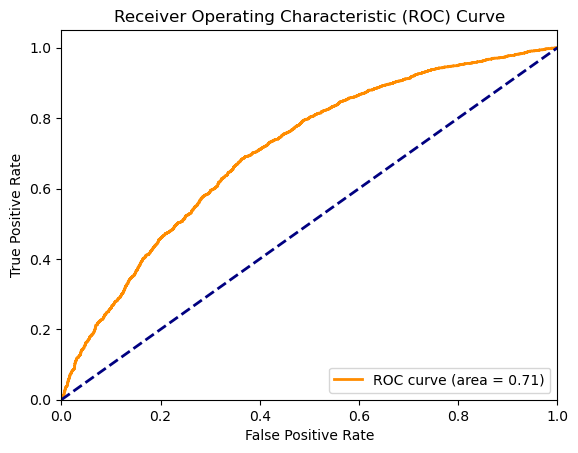

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the validation set
y_pred_proba = model.predict(validation_data_combined).ravel()  # Flatten to 1D

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(binary_validation_labels, y_pred_proba)  # Use binary_validation_labels directly
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


157/157 [==============================] - 0s 2ms/step


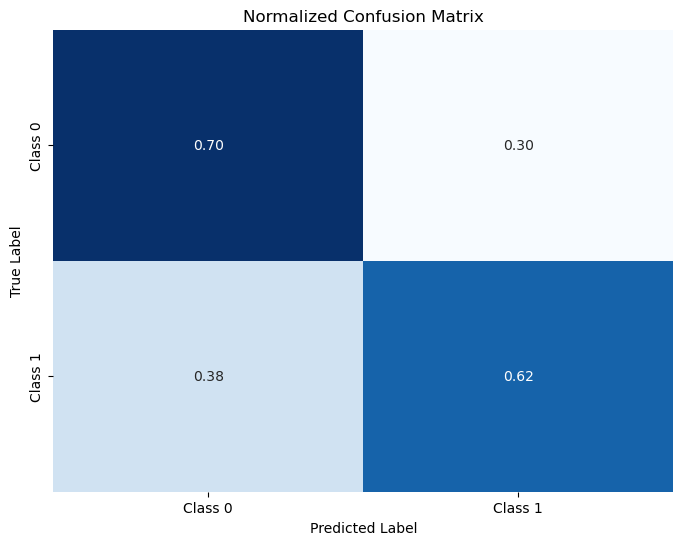

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the validation set
y_pred_probs = model.predict(validation_data_combined)

# Convert probabilities to binary predictions based on a 0.5 threshold
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Assuming binary_validation_labels are already in binary format (0 or 1)
y_true = binary_validation_labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()
